In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path

In [4]:
# Si es notebook, mejor usar:
BASE_DIR = Path.cwd()

# Ir un nivel arriba (de notebooks → raíz del repo)
ROOT = BASE_DIR.parent

# Carpeta data dentro del repo
DATA_DIR = ROOT / "data"
DATA_DIR.mkdir(exist_ok=True)

In [9]:
periodos = pd.read_csv(DATA_DIR / "periodos.csv")["Periodo"]

0    1990-1994
1    1994-1998
2    1998-2002
3    2002-2006
4    2006-2010
Name: Periodo, dtype: object

In [16]:
partidos_unicos = set()

for periodo in periodos:
    try:
        diputados = pd.read_csv(DATA_DIR / periodo / "diputados.csv")
        
        # Normalizamos nombres de columnas por si cambian entre periodos
        diputados.columns = diputados.columns.str.lower()
        print(diputados.columns)
        # Verificamos si la columna partido existe
        if "partido_nombre" in diputados.columns:
            partidos_periodo = diputados["partido_nombre"].dropna().unique()
            partidos_unicos.update(map(str.strip, partidos_periodo))
            print(f"{periodo}: {len(partidos_periodo)} partidos encontrados")
        else:
            print(f"{periodo}: no se encontró columna 'partido'")
    
    except Exception as e:
        print(f"Error en {periodo}: {e}")

# Convertimos a DataFrame para verlo más fácil
df_partidos = pd.DataFrame(sorted(partidos_unicos), columns=["partido"])
print(f"\nTotal de partidos únicos encontrados: {len(df_partidos)}")
print(df_partidos)
    

Error en 1990-1994: [Errno 2] No such file or directory: 'C:\\Users\\angel\\OneDrive\\Documents\\U\\2025-2\\Proyecto de Grado\\Legislative-Voting-Behavior-Prediction-\\data\\1990-1994\\diputados.csv'
Error en 1994-1998: [Errno 2] No such file or directory: 'C:\\Users\\angel\\OneDrive\\Documents\\U\\2025-2\\Proyecto de Grado\\Legislative-Voting-Behavior-Prediction-\\data\\1994-1998\\diputados.csv'
Index(['periodo_id', 'periodo', 'diputado_id', 'nombre_completo',
       'fecha_nacimiento', 'sexo', 'edad', 'distrito_numero', 'partido_id',
       'partido_nombre', 'militancias_anteriores', 'militancia.fechainicio',
       'militancia.fechatermino'],
      dtype='object')
1998-2002: 8 partidos encontrados
Index(['periodo_id', 'periodo', 'diputado_id', 'nombre_completo',
       'fecha_nacimiento', 'sexo', 'edad', 'distrito_numero', 'partido_id',
       'partido_nombre', 'militancias_anteriores', 'militancia.fechainicio',
       'militancia.fechatermino'],
      dtype='object')
2002-2006: 7 p

In [92]:
mapa_ideologia = {
    # IZQUIERDA
    "Frente Amplio": "Izquierda",
    "Partido Comunista": "Izquierda",
    "Partido Socialista": "Izquierda",
    "Partido Por la Democracia": "Izquierda",
    "Revolución Democrática": "Izquierda",
    "Convergencia Social": "Izquierda",
    "Comunes": "Izquierda",
    "Partido Comunes": "Izquierda",
    "Partido Humanista": "Izquierda",
    "Partido Igualdad": "Izquierda",
    "Partido Acción Humanista": "Izquierda",
    "Federación Regionalista Verde Social": "Izquierda",
    "Partido Ecologista Verde": "Izquierda",
    "Izquierda Ciudadana": "Izquierda",

    # CENTRO / CENTRO-IZQUIERDA
    "Partido Radical de Chile": "Centro",
    "Partido Liberal de Chile": "Centro",
    "Partido Progresista": "Centro",
    "Partido Demócrata Cristiano": "Centro",
    "Partido Demócratas Chile": "Centro",
    "Movimiento Amarillos por Chile": "Centro",
    "Amplitud": "Centro",  # liberal moderado
    "Partido de la Gente": "Centro",

    # DERECHA
    "Renovación Nacional": "Derecha",
    "Unión Demócrata Independiente": "Derecha",
    "Evolución Política": "Derecha",
    "Partido Republicano": "Derecha",
    "Partido Conservador Cristiano": "Derecha",
    "Partido Social Cristiano": "Derecha",
    "Partido Nacional Libertario": "Derecha",
    "Unión de Centro Progresista": "Derecha",  # vinculada a la derecha moderada

    # OTROS / INDEPENDIENTES
    "Independientes": "Independiente",
    "Partido Regionalista Independiente": "Independiente"
}


In [93]:
resumen = []

for periodo in periodos:
    try:
        diputados = pd.read_csv(DATA_DIR / periodo / "diputados.csv")
        diputados.columns = diputados.columns.str.lower()
        
        if "partido_nombre" not in diputados.columns:
            print(f"{periodo}: no tiene columna 'partido'")
            continue

        diputados["partido_nombre"] = diputados["partido_nombre"].astype(str).str.strip()
        diputados["ideologia"] = diputados["partido_nombre"].map(mapa_ideologia)
        
        total = len(diputados)
        conteo = diputados["ideologia"].value_counts(normalize=True).mul(100).round(2)
        
        fila = {"periodo": periodo, "total_diputados": total}
        for lado in ["Izquierda", "Centro-Izquierda", "Centro", "Centro-Derecha", "Derecha", "Extrema Derecha", "Centro-Populista", "Regionalista", "Independiente"]:
            fila[lado] = conteo.get(lado, 0.0)
        
        resumen.append(fila)
        
        print(f"{periodo}: procesado ({total} diputados)")
    
    except Exception as e:
        print(f"Error en {periodo}: {e}")

# --- RESULTADOS ---
df_resumen = pd.DataFrame(resumen).sort_values("periodo")
print("\nDistribución ideológica por periodo:")
print(df_resumen)

Error en 1990-1994: [Errno 2] No such file or directory: 'C:\\Users\\angel\\OneDrive\\Documents\\U\\2025-2\\Proyecto de Grado\\Legislative-Voting-Behavior-Prediction-\\data\\1990-1994\\diputados.csv'
Error en 1994-1998: [Errno 2] No such file or directory: 'C:\\Users\\angel\\OneDrive\\Documents\\U\\2025-2\\Proyecto de Grado\\Legislative-Voting-Behavior-Prediction-\\data\\1994-1998\\diputados.csv'
1998-2002: procesado (121 diputados)
2002-2006: procesado (121 diputados)
2006-2010: procesado (123 diputados)
2010-2014: procesado (125 diputados)
Error en 1965-1969: [Errno 2] No such file or directory: 'C:\\Users\\angel\\OneDrive\\Documents\\U\\2025-2\\Proyecto de Grado\\Legislative-Voting-Behavior-Prediction-\\data\\1965-1969\\diputados.csv'
2014-2018: procesado (127 diputados)
2018-2022: procesado (190 diputados)
2022-2026: procesado (228 diputados)

Distribución ideológica por periodo:
     periodo  total_diputados  Izquierda  Centro-Izquierda  Centro  \
0  1998-2002              121    

In [84]:
colores_vivos = {
    "Izquierda": "#E63946",          # rojo intenso
    "Centro-Izquierda": "#F9844A",   # naranja fuerte
    "Centro": "#F9C74F",             # amarillo vivo
    "Centro-Derecha": "#43AA8B",     # verde suave
    "Derecha": "#277DA1",            # azul fuerte
    "Extrema Derecha": "#073B4C",    # azul oscuro
    "Centro-Populista": "#9B5DE5",   # violeta vibrante
    "Regionalista": "#4CC9F0",       # celeste eléctrico
    "Independiente": "#999999"       # gris neutro
}

bloques = [
    "Izquierda", "Centro", "Derecha",
    "Independiente"
]


<Figure size 1200x600 with 0 Axes>

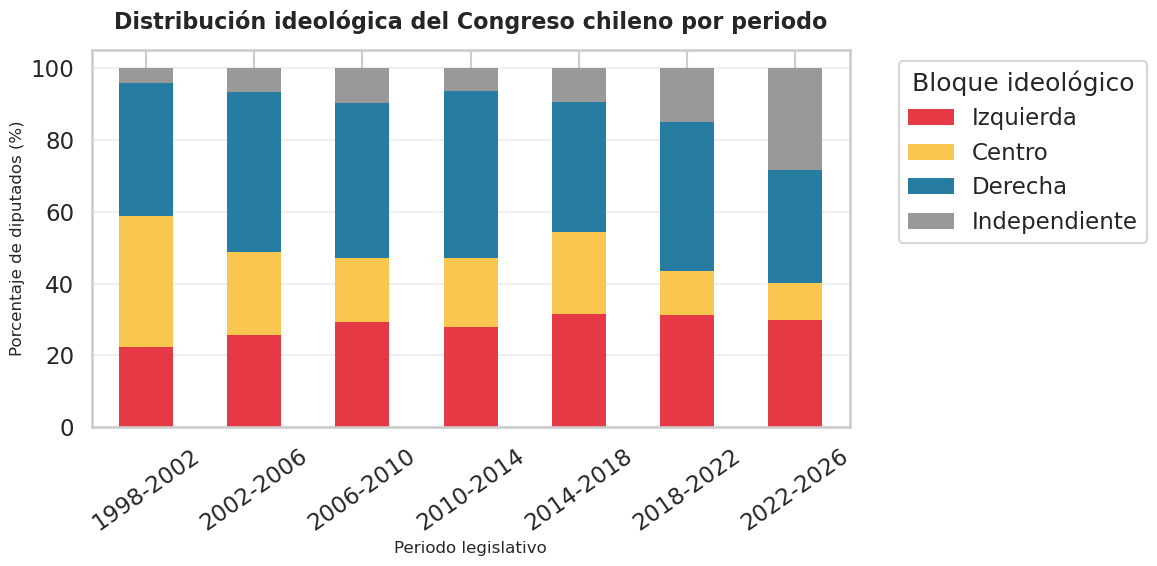

In [91]:
presidentes = {
    "1990-1994": "Aylwin",
    "1994-1998": "Frei",
    "1998-2002": "Lagos",
    "2002-2006": "Lagos",
    "2006-2010": "Bachelet 1",
    "2010-2014": "Piñera 1",
    "2014-2018": "Bachelet 2",
    "2018-2022": "Piñera 2",
    "2022-2026": "Boric"
}

# DataFrame a graficar
df_plot = df_resumen.set_index("periodo")[bloques]

plt.figure(figsize=(12,6))
df_plot.plot(
    kind="bar",
    stacked=True,
    color=[colores_vivos[b] for b in bloques],
    edgecolor="none",
    figsize=(12,6)
)

# Configuración del gráfico
plt.title("Distribución ideológica del Congreso chileno por periodo", fontsize=16, weight='bold', pad=15)
plt.ylabel("Porcentaje de diputados (%)", fontsize=12)
plt.xlabel("Periodo legislativo", fontsize=12)
plt.legend(title="Bloque ideológico", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(len(df_plot.index)), labels=[f"{p}" for p in df_plot.index], rotation=35)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

In [56]:
resultados = []
for periodo in periodos:
    try:
        boletines = pd.read_csv(DATA_DIR / periodo / "boletines.csv")
        
        if "estado" not in boletines.columns:
            print(f"No se encontró la columna 'estado' en {periodo}")
            continue

        total = len(boletines)
        aprobados = boletines["estado"].str.contains("Publi", case=False, na=False).sum()
        rechazados = boletines["estado"].str.contains("Rechaz", case=False, na=False).sum()
        tasa_aprobacion = aprobados / total * 100 if total > 0 else 0
        tasa_rechazo = rechazados / total * 100 if total > 0 else 0

        resultados.append({
            "periodo": periodo,
            "total_boletines": total,
            "aprobados": aprobados,
            "rechazados": rechazados,
            "tasa_aprobacion_%": tasa_aprobacion,
            "tasa_rechazo_%": tasa_rechazo
        })
    except Exception as e:
        print(f"Error en {periodo}: {e}")

df_tasa = pd.DataFrame(resultados).sort_values("periodo")
df_tasa

Error en 1990-1994: [Errno 2] No such file or directory: 'C:\\Users\\angel\\OneDrive\\Documents\\U\\2025-2\\Proyecto de Grado\\Legislative-Voting-Behavior-Prediction-\\data\\1990-1994\\boletines.csv'
Error en 1994-1998: [Errno 2] No such file or directory: 'C:\\Users\\angel\\OneDrive\\Documents\\U\\2025-2\\Proyecto de Grado\\Legislative-Voting-Behavior-Prediction-\\data\\1994-1998\\boletines.csv'
Error en 1965-1969: [Errno 2] No such file or directory: 'C:\\Users\\angel\\OneDrive\\Documents\\U\\2025-2\\Proyecto de Grado\\Legislative-Voting-Behavior-Prediction-\\data\\1965-1969\\boletines.csv'


,periodo,total_boletines,aprobados,rechazados,tasa_aprobacion_%,tasa_rechazo_%
0,1998-2002,104,85,3,81.730769,2.884615
1,2002-2006,589,483,12,82.003396,2.037351
2,2006-2010,697,528,24,75.753228,3.443329
3,2010-2014,676,508,17,75.147929,2.514793
4,2014-2018,708,558,7,78.813559,0.988701
5,2018-2022,841,555,10,65.992866,1.189061
6,2022-2026,656,364,5,55.487805,0.762195


In [59]:
resumen_periodos = []

for periodo in periodos:
    try:
        boletines = pd.read_csv(DATA_DIR / periodo / "boletines.csv")
        boletines.columns = boletines.columns.str.lower()
        
        if "ambitos" not in boletines.columns or "estado" not in boletines.columns:
            print(f"{periodo}: faltan columnas necesarias")
            continue
        
        # Convertir string de lista a lista real
        boletines['ambitos'] = boletines['ambitos'].apply(eval)
        
        # Explode: una fila por ámbito
        df_exp = boletines.explode('ambitos')
        df_exp['ambitos'] = df_exp['ambitos'].str.strip()
        
        # Columnas de aprobado/rechazado
        df_exp['aprobado'] = df_exp['estado'].str.contains("Publi", case=False, na=False).astype(int)
        df_exp['rechazado'] = df_exp['estado'].str.contains("Rechaz|Retirado", case=False, na=False).astype(int)
        df_exp['tramitacion'] = df_exp['estado'].str.contains("Tra", case=False, na=False).astype(int)
        
        # Agrupamos por ámbito
        resumen = df_exp.groupby('ambitos').agg(
            total=('estado', 'count'),
            aprobados=('aprobado', 'sum'),
            rechazados=('rechazado', 'sum'),
            tramitacion=('tramitacion', 'sum')
        ).reset_index()
        
        resumen['tasa_aprobacion_%'] = (resumen['aprobados'] / resumen['total'] * 100).round(2)
        resumen['tasa_rechazo_%'] = (resumen['rechazados'] / resumen['total'] * 100).round(2)
        resumen['periodo'] = periodo
        
        resumen_periodos.append(resumen)
        
        print(f"{periodo}: procesado")
        
    except Exception as e:
        print(f"Error en {periodo}: {e}")

# Concatenamos todos los periodos
df_resumen_ambitos_periodos = pd.concat(resumen_periodos, ignore_index=True)

# Ordenamos por periodo y total
df_resumen_ambitos_periodos = df_resumen_ambitos_periodos.sort_values(['periodo', 'total'], ascending=[True, False])
df_resumen_ambitos_periodos

Error en 1990-1994: [Errno 2] No such file or directory: 'C:\\Users\\angel\\OneDrive\\Documents\\U\\2025-2\\Proyecto de Grado\\Legislative-Voting-Behavior-Prediction-\\data\\1990-1994\\boletines.csv'
Error en 1994-1998: [Errno 2] No such file or directory: 'C:\\Users\\angel\\OneDrive\\Documents\\U\\2025-2\\Proyecto de Grado\\Legislative-Voting-Behavior-Prediction-\\data\\1994-1998\\boletines.csv'
1998-2002: procesado
2002-2006: procesado
2006-2010: procesado
2010-2014: procesado
Error en 1965-1969: [Errno 2] No such file or directory: 'C:\\Users\\angel\\OneDrive\\Documents\\U\\2025-2\\Proyecto de Grado\\Legislative-Voting-Behavior-Prediction-\\data\\1965-1969\\boletines.csv'
2014-2018: procesado
2018-2022: procesado
2022-2026: procesado


,ambitos,total,aprobados,rechazados,tramitacion,tasa_aprobacion_%,tasa_rechazo_%,periodo
2,Economía y Hacienda,25,22,1,0,88.00,4.00,1998-2002
8,Seguridad y Justicia,17,15,0,1,88.24,0.00,1998-2002
4,Gobierno y Política,14,11,0,0,78.57,0.00,1998-2002
9,Trabajo y Previsión,11,8,1,1,72.73,9.09,1998-2002
10,Transporte y Telecomunicaciones,10,8,0,0,80.00,0.00,1998-2002
...,...,...,...,...,...,...,...,...
78,Cultura y Deporte,28,23,0,5,82.14,0.00,2022-2026
88,Transporte y Telecomunicaciones,26,24,0,2,92.31,0.00,2022-2026
84,Relaciones Exteriores,20,20,0,0,100.00,0.00,2022-2026
81,Educación,19,13,0,6,68.42,0.00,2022-2026


In [60]:
df_resumen_ambitos_periodos[df_resumen_ambitos_periodos["ambitos"]  == "Educación"]

,ambitos,total,aprobados,rechazados,tramitacion,tasa_aprobacion_%,tasa_rechazo_%,periodo
3,Educación,9,8,0,0,88.89,0.0,1998-2002
16,Educación,33,31,0,0,93.94,0.0,2002-2006
29,Educación,29,22,0,5,75.86,0.0,2006-2010
42,Educación,38,27,0,7,71.05,0.0,2010-2014
55,Educación,63,53,0,9,84.13,0.0,2014-2018
68,Educación,48,31,0,15,64.58,0.0,2018-2022
81,Educación,19,13,0,6,68.42,0.0,2022-2026


In [71]:
# Pivotear materias para que cada una sea columna
df_materias_pivot = df_resumen_ambitos_periodos.pivot(
    index='periodo',
    columns='ambitos',
    values='tasa_aprobacion_%'
).fillna(0)  # rellenar con 0 si no hubo boletines de esa materia

# Asegurarnos de tener el mismo orden de periodos que el df de congresos
df_congreso = df_resumen.set_index('periodo')
df_congreso = df_congreso.loc[df_materias_pivot.index]

# Concatenamos porcentaje de diputados y tasa de aprobación
df_corr = pd.concat([df_congreso, df_materias_pivot], axis=1)

In [72]:
# Solo bloques de Congreso vs materias
bloques = ["Izquierda", "Centro-Izquierda", "Centro", "Centro-Derecha", "Derecha"]
materias = df_materias_pivot.columns.tolist()

corr_matrix = df_corr[bloques + materias].corr().loc[bloques, materias]

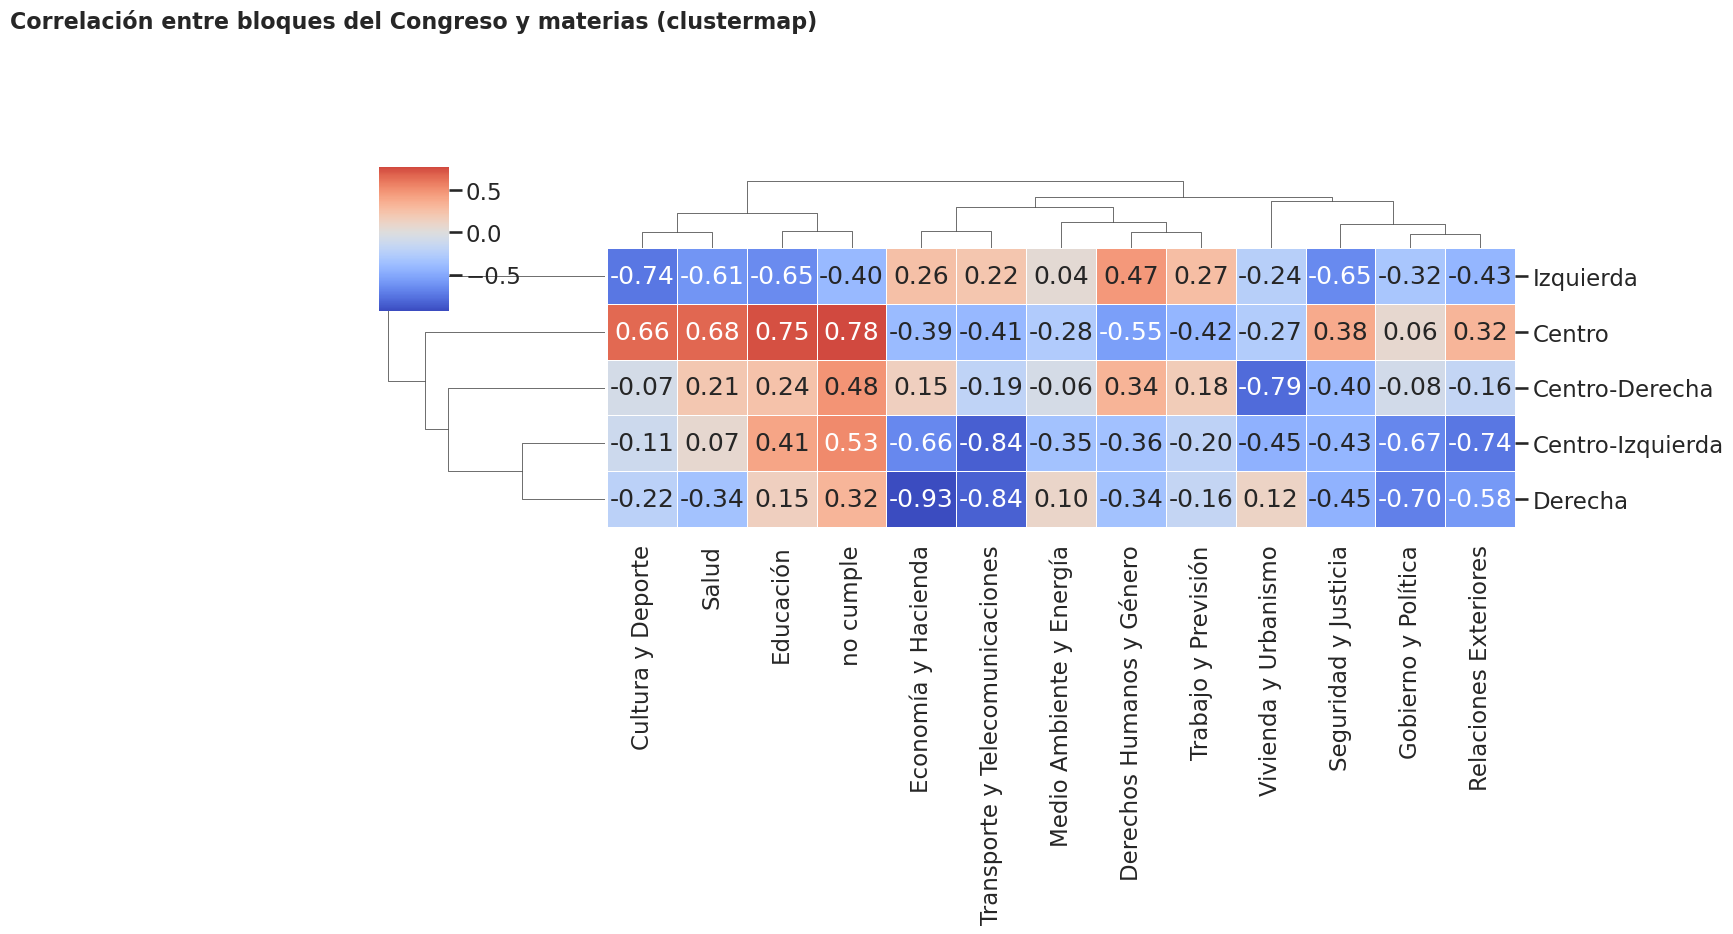

In [73]:
sns.clustermap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5, figsize=(14,8), center=0)
plt.title("Correlación entre bloques del Congreso y materias (clustermap)", pad=100, fontsize=16, weight='bold')
plt.show()

In [75]:
# Pivotear materias para que cada una sea columna
df_materias_pivot = df_resumen_ambitos_periodos.pivot(
    index='periodo',
    columns='ambitos',
    values='total'
).fillna(0)  # rellenar con 0 si no hubo boletines de esa materia

# Asegurarnos de tener el mismo orden de periodos que el df de congresos
df_congreso = df_resumen.set_index('periodo')
df_congreso = df_congreso.loc[df_materias_pivot.index]

# Concatenamos porcentaje de diputados y tasa de aprobación
df_corr = pd.concat([df_congreso, df_materias_pivot], axis=1)

In [76]:
# Solo bloques de Congreso vs materias
bloques = ["Izquierda", "Centro-Izquierda", "Centro", "Centro-Derecha", "Derecha"]
materias = df_materias_pivot.columns.tolist()

corr_matrix = df_corr[bloques + materias].corr().loc[bloques, materias]

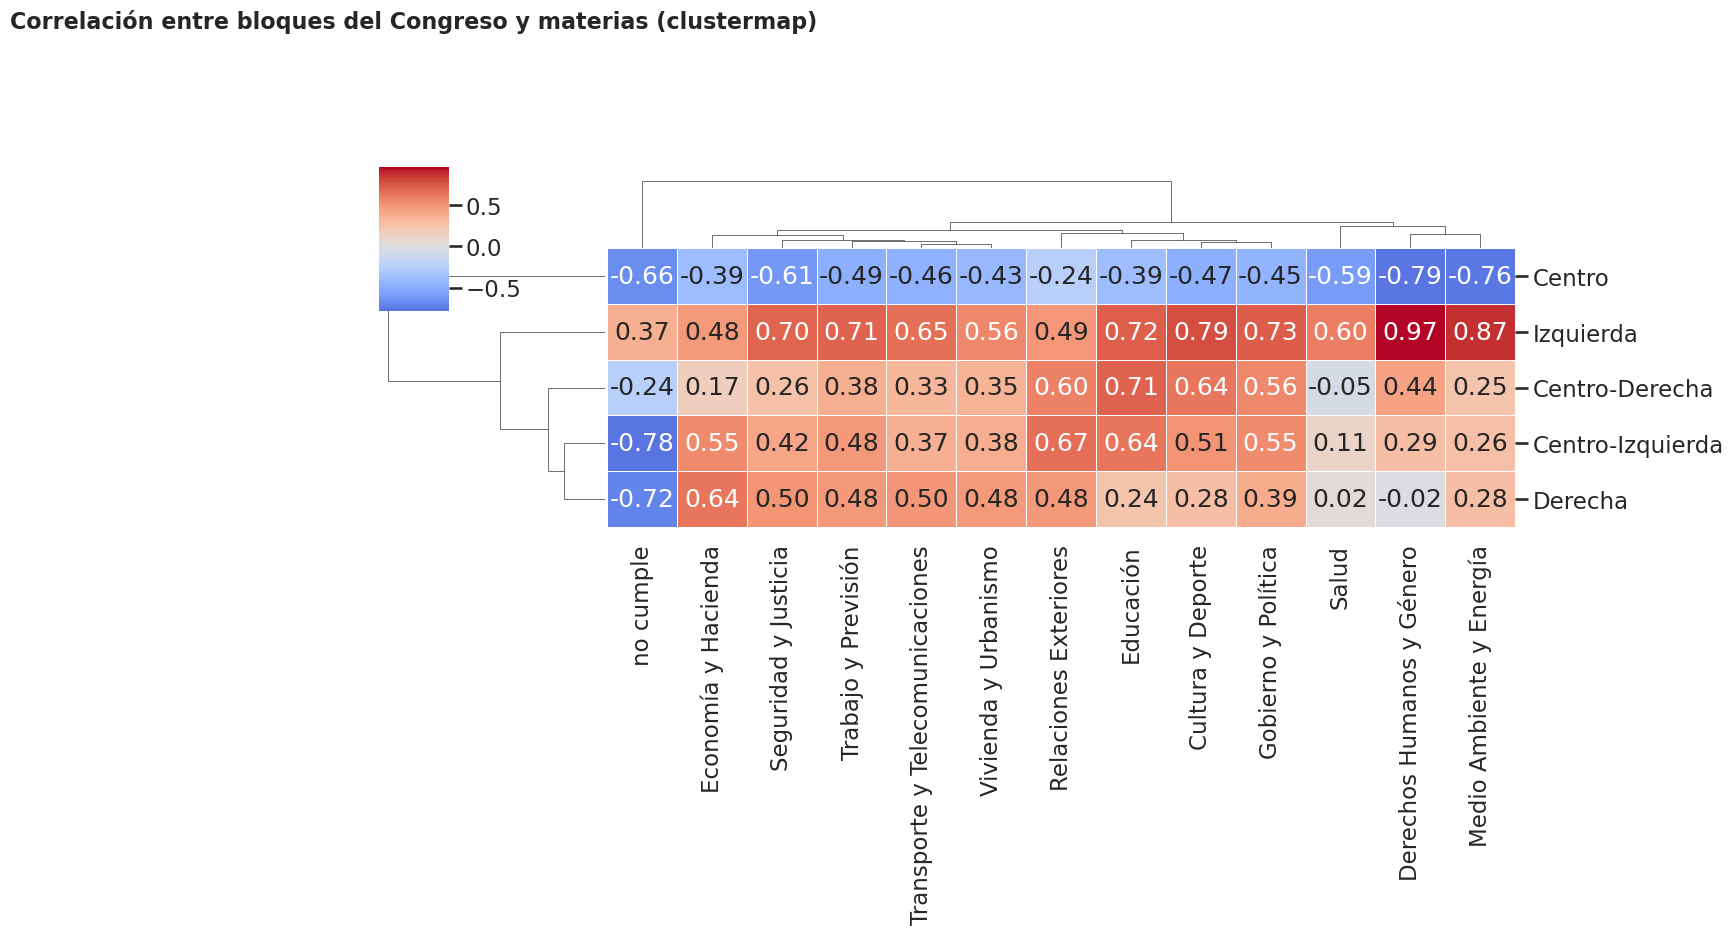

In [77]:
sns.clustermap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5, figsize=(14,8), center=0)
plt.title("Correlación entre bloques del Congreso y materias (clustermap)", pad=100, fontsize=16, weight='bold')
plt.show()

ValueError: The condensed distance matrix must contain only finite values.

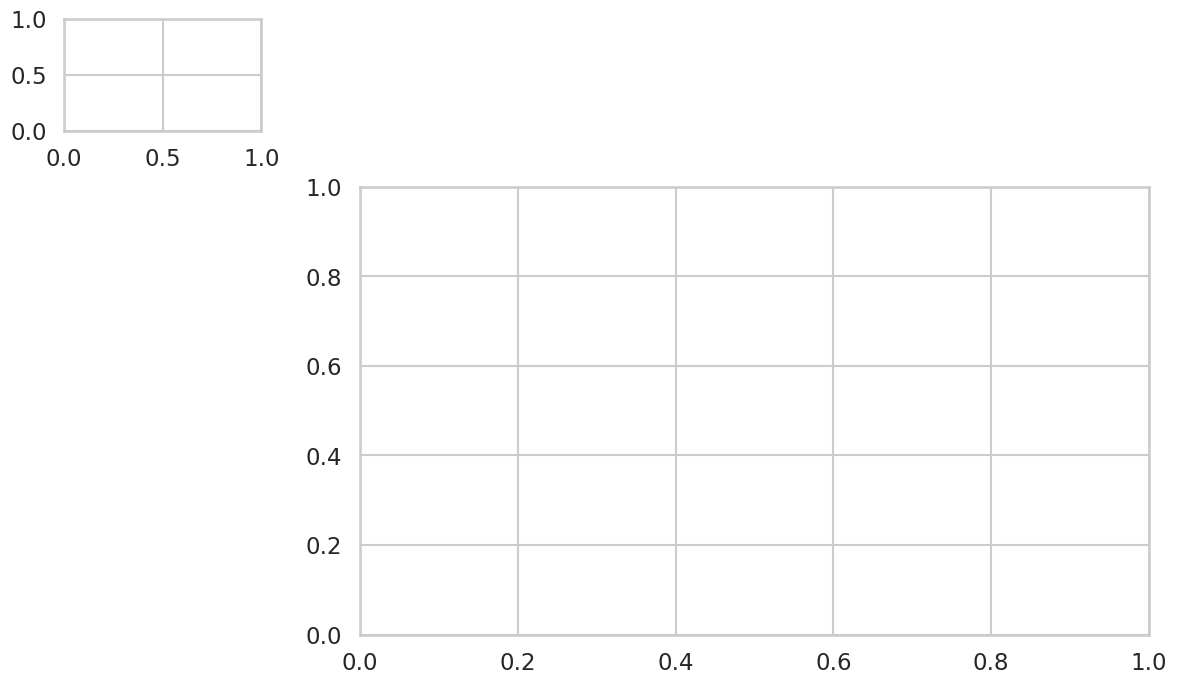

In [81]:
# Pivotear materias para que cada una sea columna
df_materias_pivot = df_resumen_ambitos_periodos.pivot(
    index='periodo',
    columns='ambitos',
    values='tasa_rechazo_%'
).fillna(0)  # rellenar con 0 si no hubo boletines de esa materia

# Asegurarnos de tener el mismo orden de periodos que el df de congresos
df_congreso = df_resumen.set_index('periodo')
df_congreso = df_congreso.loc[df_materias_pivot.index]

# Concatenamos porcentaje de diputados y tasa de aprobación
df_corr = pd.concat([df_congreso, df_materias_pivot], axis=1)

bloques = ["Izquierda", "Centro-Izquierda", "Centro", "Centro-Derecha", "Derecha"]
materias = df_materias_pivot.columns.tolist()

corr_matrix = df_corr[bloques + materias].corr().loc[bloques, materias]

sns.clustermap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5, figsize=(14,8), center=0)
plt.title("Correlación entre bloques del Congreso y materias (clustermap)", pad=100, fontsize=16, weight='bold')
plt.show()